# Movie Reviews Classification

#### Problem Statement II

#### Classify movie reviews as positive or negative using the text of the review.

This is an example of a binary—or two-class—classification, an important kind of machine
learning problem.
Use the IMDB Dataset that contains the text of 50,000 movie reviews from the Internet Movie
Database . These are split into 25,000 reviews for training and 25,000 reviews for testing. The
training and testing sets are balanced.
Source -The IMDB dataset is available on  imdb reviews  or on TensorFlow datasets.
You are free to use it with a python based platform of your choice ( e.g. Keras/TF, Pytorch,
Pycharm etc) in a python environment. We expect that you include the required visualizations,
comments and results as part of your python code.
The solution MUST use a deep learning method and demonstrate near-SOTA accuracy.

In [1]:
## Imports

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [2]:
# tensorflow version used
tf.__version__

'2.5.0'

In [3]:
train_data, validation_data, test_data = tfds.load(name="imdb_reviews",
            split=('train[:60%]', 'train[60%:]', 'test'), as_supervised=True)

### Data Size

In [4]:
print('Training Data size   :: ', len(train_data))
print('Validation Data size :: ', len(validation_data))
print('Testing Data size    :: ', len(test_data))

Training Data size   ::  15000
Validation Data size ::  10000
Testing Data size    ::  25000


### Following is Sample batch of 3 reviews

In [5]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(3)))

In [6]:
train_examples_batch

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

### Following are labels for reviews
#### 0 - Review is negative
#### 1 - Review is positive

In [7]:
train_labels_batch

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 0, 0], dtype=int64)>

### Using gnews-swivel-20dim 
#### Token based text embedding trained on English Google News 130GB corpus.

In [8]:
pretrained_model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(pretrained_model, input_shape=[], dtype=tf.string, trainable=True)

In [9]:
train_examples_batch[:2]

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [10]:
hub_layer(train_examples_batch[:2])

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ]],
      dtype=float32)>

### Keras Sequential Model
![model](model.jpg)

In [11]:
model = tf.keras.Sequential()

# neural network layers
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


### Configuring the model 

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Training the Model with 40 Epochs

In [13]:
history = model.fit(train_data.shuffle(10000).batch(512),
          epochs=40,
          validation_data=validation_data.batch(512),
          verbose=1)

Epoch 1/40
30/30 [==============================] - 4s 96ms/step - loss: 0.7071 - accuracy: 0.6209 - val_loss: 0.6565 - val_accuracy: 0.6441
Epoch 2/40
30/30 [==============================] - 3s 83ms/step - loss: 0.6079 - accuracy: 0.6822 - val_loss: 0.5874 - val_accuracy: 0.6974
Epoch 3/40
30/30 [==============================] - 3s 83ms/step - loss: 0.5552 - accuracy: 0.7224 - val_loss: 0.5475 - val_accuracy: 0.7346
Epoch 4/40
30/30 [==============================] - 2s 80ms/step - loss: 0.5184 - accuracy: 0.7548 - val_loss: 0.5184 - val_accuracy: 0.7578
Epoch 5/40
30/30 [==============================] - 2s 81ms/step - loss: 0.4871 - accuracy: 0.7779 - val_loss: 0.4906 - val_accuracy: 0.7782
Epoch 6/40
30/30 [==============================] - 2s 80ms/step - loss: 0.4564 - accuracy: 0.7999 - val_loss: 0.4659 - val_accuracy: 0.7952
Epoch 7/40
30/30 [==============================] - 2s 80ms/step - loss: 0.4273 - accuracy: 0.8174 - val_loss: 0.4426 - val_accuracy: 0.8080
Epoch 8/40
30

### Predicting 3 simple review sentences

In [14]:
model.predict(["This is the worst movie I have ever seen",
              "An excellent movie that I enjoyed a lot",
              "how can one make such a horrible movie? there is no story, acting direction everything is very poor"])

array([[2.1716893e-02],
       [9.9997926e-01],
       [2.9364228e-04]], dtype=float32)

### Predicting reviews outside the dataset


#### 9 Star review of movie Tenet
![9star](9star.png)
#### Predicted value is about 0.9 i.e. review is positive just as the user rating. 

In [15]:
model.predict(["""It really confused me when I watched it yesterday. I can honestly say that I probably missed lots of 
                details even though it came around in the end and settled nicely. I am sure that people who dive into the 
                details will find these bits and pieces and time will help to digest the whole story. No matter you hate 
                it or love it but you have to admit that the movies from Nolan are simply so innovative which the current 
                movie industry simply cannot reproduce. He writes the story itself, he directs, chooses the actors, the 
                locations and he mainly uses real world setups instead of computer generated ones. He is so creative and 
                luckily does have the financial background to complete his plans. I think the main flaw of this movie that 
                the viewer can feel unsatisfied at the end due to the complex setup and this brutal backwards mechanics."""])

array([[0.9794344]], dtype=float32)

#### 1 Star review of movie Tenet
![1star](1star.png)
#### Predicted value is about 0.01 i.e. review is negative just as the user rating.

In [16]:
model.predict(["""The movie started with a very intense "Batman" like opening. This movie showed promise the first twenty 
                minutes and even though nothing made sense, there was still hope that it would all be tied together and 
                all make sense. Unfortunately, hope was lost quickly and the plot disappeared into a endless past-future 
                alternate reality abyss and never came back. This movie lacked depth and seemed pretentious from Nolan. 
                A truly intellectual "flex" that surely he had no idea what was going on either. If there was one good 
                thing from Covid is- very few people have had to sit through this disaster of a movie."""])

array([[0.02783105]], dtype=float32)

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting Model Accuracy and Loss

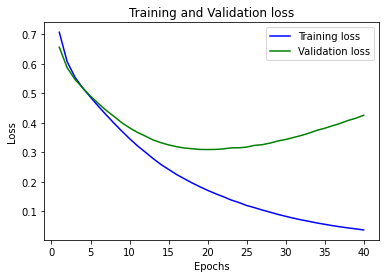

In [18]:
# Plotting Training and Validation Loss

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

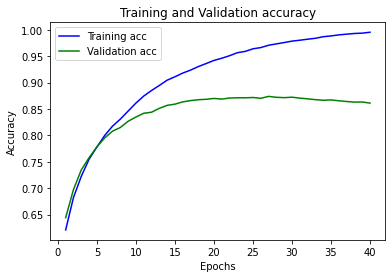

In [19]:
# Plotting Training and Validation Accuracy

plt.clf()

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model Analysis

1. The input string is a review string that in converted into a 20 shape array of numbers generated by hub_layer. This string if further passed to ReLU layer and then to Sigmoid layer for output.
2. The output of the neural network is probability where output near 0 signifies input string is a negative review and near 1 signifies input string is a positive review.
3. This model was able to reach an accuracy of 87%.
4. Analyzing the validation accuracy and loss plots, The model has an increase in accuracy and decrease in losses till Epoch 20. After epoch 20, It flattens in accuracy and increases in the losses.

### References

1. https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1
2. https://www.tensorflow.org/api_docs/python/tf/nn/embedding_lookup_sparse
3. https://paperswithcode.com/sota/sentiment-analysis-on-imdb
4. https://www.kaggle.com/arunkumarramanan/awesome-ml-and-text-classification-movie-reviews